## 문제
어떤 극장의 좌석은 한 줄로 되어 있으며 왼쪽부터 차례대로 1번부터 N번까지 번호가 매겨져 있다. 공연을 보러 온 사람들은 자기의 입장권에 표시되어 있는 좌석에 앉아야 한다. 예를 들어서, 입장권에 5번이 쓰여 있으면 5번 좌석에 앉아야 한다. 단, 자기의 바로 왼쪽 좌석 또는 바로 오른쪽 좌석으로는 자리를 옮길 수 있다. 예를 들어서, 7번 입장권을 가진 사람은 7번 좌석은 물론이고, 6번 좌석이나 8번 좌석에도 앉을 수 있다. 그러나 5번 좌석이나 9번 좌석에는 앉을 수 없다.

그런데 이 극장에는 “VIP 회원”들이 있다. 이 사람들은 반드시 자기 좌석에만 앉아야 하며 옆 좌석으로 자리를 옮길 수 없다.

오늘 공연은 입장권이 매진되어 1번 좌석부터 N번 좌석까지 모든 좌석이 다 팔렸다. VIP 회원들의 좌석 번호들이 주어졌을 때, 사람들이 좌석에 앉는 서로 다른 방법의 가짓수를 구하는 프로그램을 작성하시오.

예를 들어서, 그림과 같이 좌석이 9개이고, 4번 좌석과 7번 좌석이 VIP석인 경우에 <123456789>는 물론 가능한 배치이다. 또한 <213465789> 와 <132465798> 도 가능한 배치이다. 그러나 <312456789> 와 <123546789> 는 허용되지 않는 배치 방법이다.

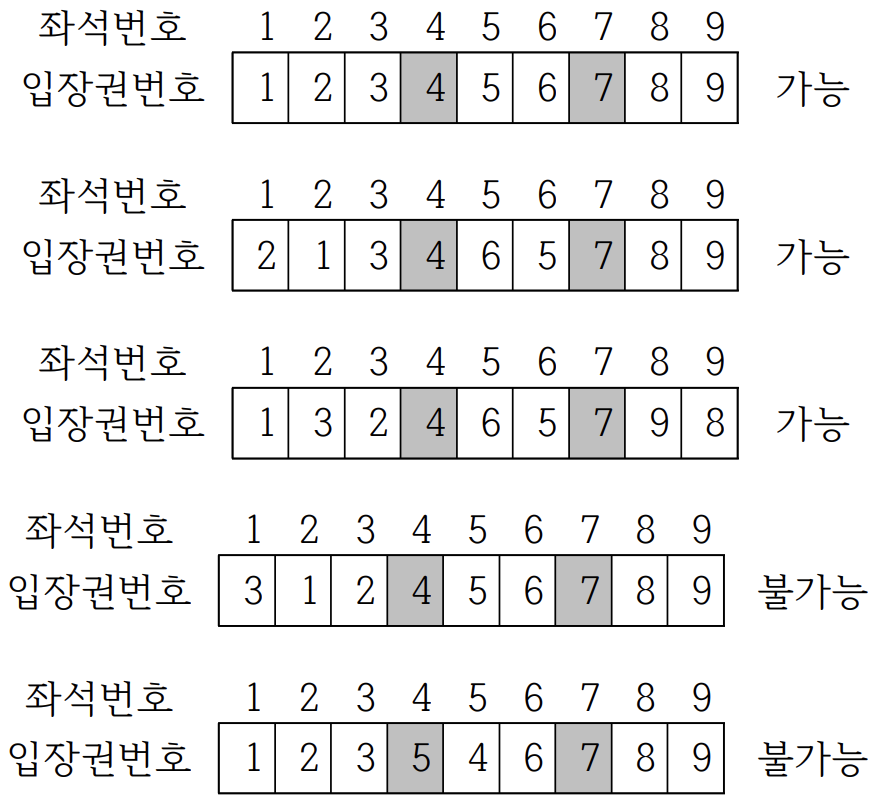

### 입력
첫째 줄에는 좌석의 개수 N이 입력된다. N은 1 이상 40 이하이다. 둘째 줄에는 고정석의 개수 M이 입력된다. M은 0 이상 N 이하이다. 다음 M 개의 줄에는 고정석의 번호가 작은 수부터 큰 수의 순서로 한 줄에 하나씩 입력된다.

### 출력
주어진 조건을 만족하면서 사람들이 좌석에 앉을 수 있는 방법의 가짓수를 출력한다. 방법의 가짓수는 2,000,000,000을 넘지 않는다. (2,000,000,000 < 231-1)

### 예제 입력 1 
9\
2\
4\
7

### 예제 출력 1 
12

#### 알고리즘 분류
- 다이나믹 프로그램

#### 풀이
- 왼쪽부터 차례대로 1~N 번호
- 자신의 번호 기준 ±1 이동가능
- VIP는 이동 불가
- 앉는 방법 가짓수 구하기

In [ ]:
N = int(input())
M = int(input())
VIP = [int(input()) for _ in range(M)]

# dp 생성
dp = [0] * (N + 1)
dp[0] = 1
dp[1] = 1 # 1
dp[2] = 2 # 1 2, 2 1

# dp[3] 부터 점화식으로 생성
for i in range(3, N + 1):
    dp[i] = dp[i - 1] + dp[i - 2]

answer = 1 # 경우의 수
# vip의 유무에 따라 경우의 수 고려
if M > 0:
    pre = 0
    # 반복문을 통해 vip 사이에 그룹에 들어가는 경우의 수를 확인
    for j in range(M):
        answer *= dp[VIP[j] - 1 - pre]
        pre = VIP[j]
    answer *= dp[N - pre]

else:
    answer = dp[N]
print(answer)